## Train neural network : basic classification
- MNIST dataset 
- Process, Build model

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


## Data load
- Data set : Fashion-MNIST (의류 이미지 데이터) 
- Train set : 의류 이미지 
- Test set : 의류 label 

In [3]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fasion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
# train_label 데이터 갯수
len(train_labels)

60000

In [13]:
# train_label 데이터 형식 (train_labels도 같은 데이터 형식.)
type(train_labels)

numpy.ndarray

In [10]:
test_images.shape

(10000, 28, 28)

## Preprocess the data

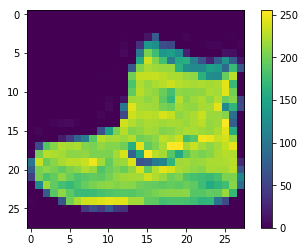

In [14]:
plt.figure() # Creates a new figure.
plt.imshow(train_images[0])
plt.colorbar() # Add a colorbar to a plot.
plt.grid(False)

In [16]:
# divide by 255 to scale 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

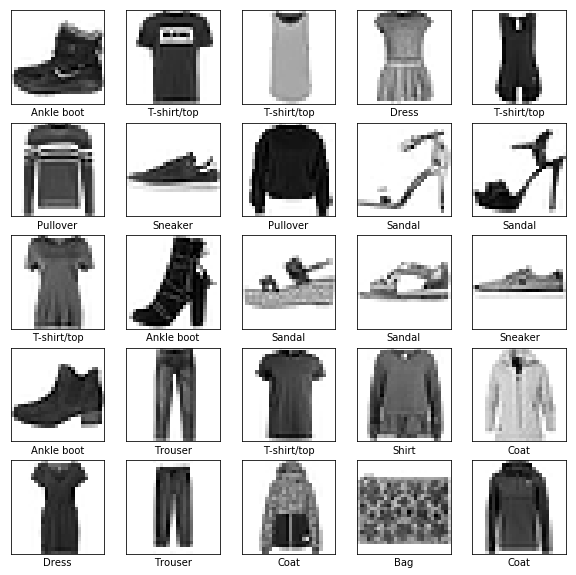

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) #Return a subplot axes at the given grid position.
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) #Display an image on the axes.
    plt.xlabel(class_names[train_labels[i]])

## Build the model  
- Flatten layer: 2차원의 image데이터를 1차원으로 변형한다(transform)
- 2개의 Dense layer : 완전 연결 
    + softmax layer : 10개의 probability를 벹음(sum = 1)

In [20]:
# 모델 빌딩
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the model 
- traing 시키기 전에 필요한 과정 
- Loss function, Optimizer, Metrics 정의 

In [21]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model 
1. Feed the training data to the model (fit)
2. Training 
3. To make prediction about a test set 

In [24]:
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 1.7578 - acc: 0.5349
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 1.6801 - acc: 0.5547
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 1.6088 - acc: 0.5708
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 1.5433 - acc: 0.5845
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 1.4838 - acc: 0.5956
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 1.4297 - acc: 0.6052
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 1.3805 - acc: 0.6139
Epoch 8/10
60000/60000 [==============================] - 7s 112us/step - loss: 1.3357 - acc: 0.6218
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 1.2950 - acc: 0.6292
Epoch 10/10
60000/60000 [==============================] - 6s 101us/step - loss: 1.2577 - acc: 0

## Evaluate accuracy 

In [25]:
# training acc와 test acc간의 gap이 생기는 이유 : overfitting 
# overfitting : unseen data(new data)에 대해서 예측을 잘 못하는 현상
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/step
Test accuracy: 0.6336


## Make predictions

In [27]:
predictions = model.predict(test_images)

In [28]:
type(predictions)

numpy.ndarray

In [29]:
predictions[0]

array([0.02236638, 0.01304565, 0.04793055, 0.05197277, 0.04160225,
       0.11620802, 0.02603049, 0.22629115, 0.07029742, 0.38425532],
      dtype=float32)

In [30]:
# argmax : Returns the indices of the maximum values along an axis.
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

## Graph to look  

In [45]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)  
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], #xlable에 예측 label 넣어줌
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

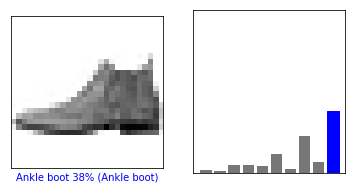

In [49]:
# 첫번째 이미지 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

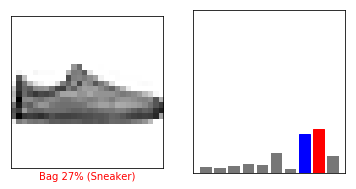

In [50]:
# 13번째 이미지 확인
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

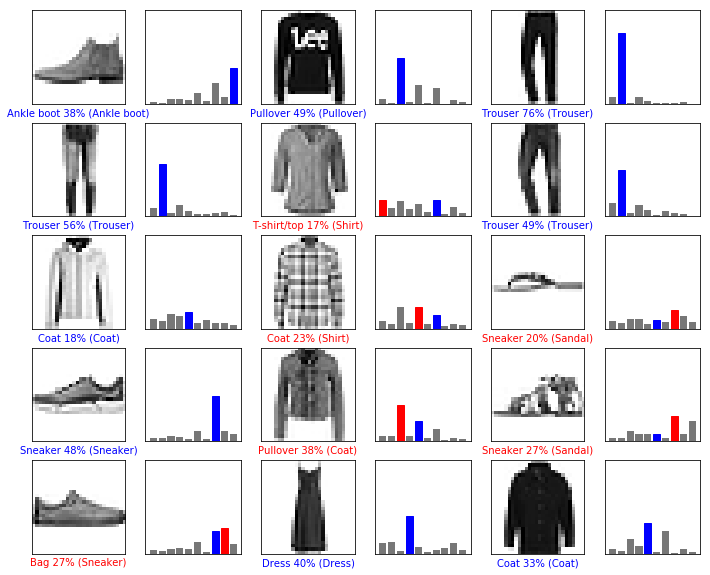

In [52]:
# 예측 맞으면 blue, 틀리면 red 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols #15개
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols,2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [53]:
img = test_images[0]
print(img.shape)

(28, 28)


In [54]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [55]:
predictions_single = model.predict(img)
print(predictions_single)

[[0.0223664  0.01304565 0.04793056 0.05197276 0.04160227 0.11620804
  0.0260305  0.22629113 0.07029743 0.38425532]]


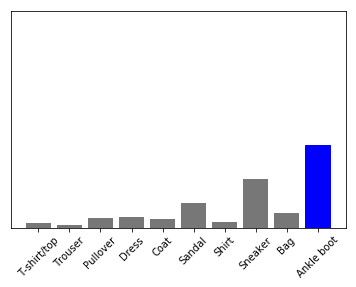

In [56]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
np.argmax(predictions_single[0])

9